<h1>Traffic Sign Recognition Classifier</h1>

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle
import cv2

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.
import numpy as np
# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = str(len(X_train[0][0])) + 'x' + str(len(X_train[0])) + 'x' + str(len(X_train[0][0][0]))

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.array(y_train)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 32x32x3
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

17


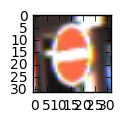

In [3]:
### Data exploration visualization goes here.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index]

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Trained and tested model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset). Used the LeNet Architecture as reference.

<h2>Imports</h2>

In [4]:
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.model_selection import train_test_split

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
def normalize(img_batch):
    norm = (np.array(img_batch)/127.5) - 1
    return norm.astype(np.float32)

X_train = normalize(X_train)
X_test = normalize(X_test)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

EPOCHS = 11
BATCH_SIZE = 50

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32) 

rate = 0.001

The way I preprocessed the data was that I first normalized the images. This puts the images in a more consistent range (i.e. -1 to 1), allowing the images to be more “normal” (i.e.This makes sure that the range of the pixels for the data being compared in all images is on the same range and that we’re not comparing data point which aren’t on a common scale range) and thus allowing for better results. Along with normalizing the data, because the data wasn’t split between training and validating data, I also did that.

### Question 2

Describe how you set up the training, validation and testing data for your model.

**Answer:**

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    #dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

def evaluate(X_data, y_data, kp):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: kp})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

The files provided were split into 2: training and testing, also, they were already labeled such. I left the testing data as is (after having normalized it), but split the training data into 2 parts. I used the recommended 80/20 split to split the training data into training and validating data.

### Question 3

What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) 

**Answer:**

In [1]:
### Train model here.
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
num_examples = len(X_train)

print("Training...")
print()
for i in range(EPOCHS):
    X_train, y_train = shuffle(X_train, y_train)
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_train[offset:end], y_train[offset:end]
        sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

    validation_accuracy = evaluate(X_validation, y_validation, 1.0)
    print("EPOCH {} ...".format(i+1))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    print()

NameError: name 'tf' is not defined

The architecture for this project consisted of several layers. It took in an image with all 3 color dimensions (RGB, thereafter performing the following:
1.	Layer 1: Convolution Layer
<ul>
<li>Input: 32x32x3</li>
<li>Filter: 5x5x3x6 (standard deviation: 0.1, mean: 0)</li>
<li>Stride for filter: 1x1x1x1</li>
<li>Padding: Valid (i.e. no padding with 0s)</li>
<li>Output: 28x28x6</li>
</ul>
2.	Relu function between Layer 1 and Layer 2
3.	Max Pool Layer 1
<ul>
<li>Input: 26x26x6</li>
<li>Filter: 1x2x2x1</li>
<li>Stride for filter: 1x2x2x1</li>
<li>Padding: Valid (i.e. no padding with 0s)</li>
<li>Output: 14x14x6</li>
</ul>
4.	Layer 2: Convolution Layer
<ul>
<li>Input: 14x14x6</li>
<li>Filter: 5x5x6x16 (Standard Deviation: 0.1, Mean: 0)</li>
<li>Stride for filter: 1x1x1x1</li>
<li>Padding: Valid (i.e. no padding with 0s)</li>
<li>Output: 10x10x6</li>
</ul>
5.	Relu function between Layer 2 and Layer 3
6.	Max Pool Layer 2
<ul>
<li>Input: 10x10x6</li>
<li>Filter: 1x2x2x1</li>
<li>Stride for filter: 1x2x2x1</li>
<li>Padding: Valid (i.e. no padding with 0s)</li>
<li>Output: 5x5x6</li>
</ul>
7.	Flattened for fully connected layer
8.	Layer 3: Fully Connected Layer
<ul>
<li>Input: 400</li>
<li>Standard Deviation: 0.1, Mean: 0</li>
<li>Output: 120</li>
</ul>
9.	Relu function between Layer 3 and Layer 4
10.	Layer 4: Fully Connected Layer
<ul>
<li>Input: 120</li>
<li>Standard Deviation: 0.1, Mean: 0</li>
<li>Output: 84</li>
</ul>
11.	Relu function between Layer 4 and Layer 5
12.	Dropout on Relu output of Layer 4 to avoid the problem of overfitting training data
13.	Layer 5: Fully Connected Layer
<ul>
<li>Input: 84</li>
<li>Standard Deviation: 0.1, Mean: 0</li>
<li>Output: 10</li>
</ul>

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

The way the model was trained was by running batches of 50 images for 11 epochs. I had tried a few different batch sizes and found that going too large wouldn't give me the results I was looking for and going smaller than 50 didn't really give me better results. As for epochs, I had originally chose 20, but was corrected by the reviewer at Udacity and did realize that my results didn't change significantly after the 11th epoch and that it could and often does cause for overfitting. The optimizer used for training was the Adam Optimizer, with a learning rate of 0.001. The optimizer was called on every batch. For every epoch, after training the model, the validation data was used to validate the accuracy of the model thus far. The next epoch would take the accuracy of the previous epoch into account when training the model, thus improving the model. As for the dropout rate, as recommended, 0.5 was used when training and 1.0 was used when evaluating. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

In [8]:
test_accuracy = evaluate(X_test, y_test, 1.0)
print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.935


Many of the hyperparameters and functions used throughout the project used were recommended throughout the lectures on Tensorflow’s website. The epoch and batch size came after some trial and error. I found that after a point, increasing the epochs without having changed the batch size makes the training time quite long and doesn’t make much of a different at the result. After much trial and error, I felt an epoch size of 20 and batch size of 50 are good hyperparameters, giving me a decent training time and decent results.


I felt the Lenet architecture provided in the examples was a very good foundation, because without even tweaking it, the results were already quite decent. Adding normalization and dropout to the already existing code gave very good results.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that found on the web, and ran them through the classifier to produce example results.

In [6]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

img1 = mpimg.imread('imgs/9.jpg')
img2 = mpimg.imread('imgs/13.jpg')
img3 = mpimg.imread('imgs/17.jpg')
img4 = mpimg.imread('imgs/25.jpg')
img5 = mpimg.imread('imgs/31.jpg')

X_import = []
y_import = [9,13,17,25,31]

X_import.append(img1)
X_import.append(img2)
X_import.append(img3)
X_import.append(img4)
X_import.append(img5)

X_import = normalize(X_import)

X_import = np.array(X_import)
y_import = np.array(y_import)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [11]:
import_accuracy = evaluate(X_import, y_import, 1.0)
print("Import Accuracy = {:.3f}".format(import_accuracy))

Import Accuracy = 1.000


For the images, I found 5 different German traffic signs on Google. I found them in images, so I cropped and resized them in MS Paint. I chose German traffic signs, because that’s what the model was trained on. The images I chose were pretty good pictures. They were pictures of the signs head on and the way I cropped them left only the traffic sign there. I also resized the images to be 32x32 pixels. With the pictures I chose, I don’t believe there was really anything which would cause for confusion in the predicting of it. Perhaps if there was snow on the sign or the sign was somewhat distorted (e.g. damaged and deformed), then perhaps that would be an issue or if they were traffic signs which the model had never seen before (maybe traffic signs from China?), then classifying the sign would be difficult for this model and I wouldn't expect good results.

### Question 7

Is your model able to perform equally well on captured pictures when compared to testing on the dataset?


**Answer:**

In [12]:
### Visualize the softmax probabilities here.
soft = tf.nn.softmax(logits)
pre5 = tf.nn.top_k(soft, k=5)
top5 = sess.run(pre5, feed_dict={x: X_import, y: y_import, keep_prob: 1.0})


The model performed as expected, giving 100% accuracy.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

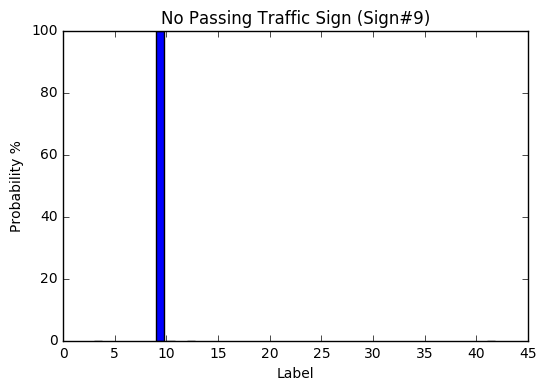

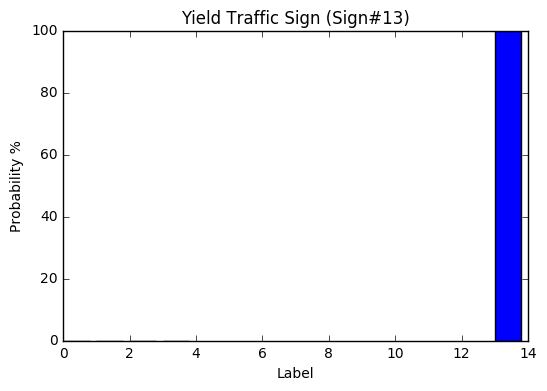

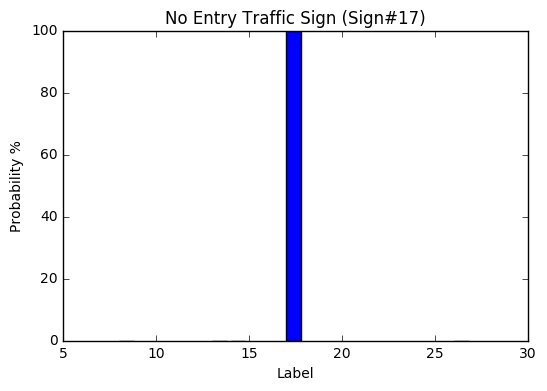

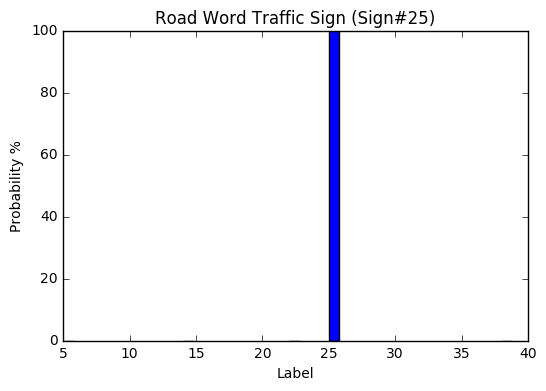

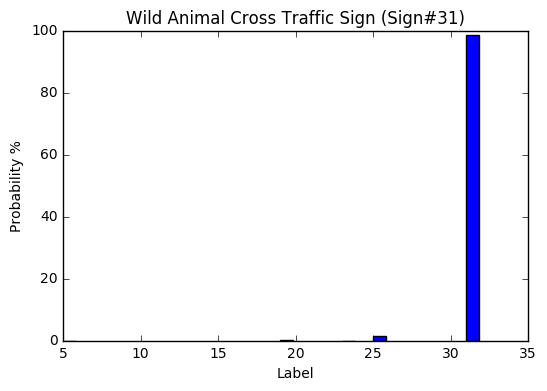

In [13]:
plt.title("No Passing Traffic Sign (Sign#9)")
plt.xlabel("Label")
plt.ylabel("Probability %")
plt.bar(top5[1][0], top5[0][0]*100)
plt.show()
plt.title("Yield Traffic Sign (Sign#13)")
plt.xlabel("Label")
plt.ylabel("Probability %")
plt.bar(top5[1][1], top5[0][1]*100)
plt.show()
plt.title("No Entry Traffic Sign (Sign#17)")
plt.xlabel("Label")
plt.ylabel("Probability %")
plt.bar(top5[1][2], top5[0][2]*100)
plt.show()
plt.title("Road Word Traffic Sign (Sign#25)")
plt.xlabel("Label")
plt.ylabel("Probability %")
plt.bar(top5[1][3], top5[0][3]*100)
plt.show()
plt.title("Wild Animal Cross Traffic Sign (Sign#31)")
plt.xlabel("Label")
plt.ylabel("Probability %")
plt.bar(top5[1][4], top5[0][4]*100)
plt.show()

As you can see from the graphs, the model has overwhelming confidence in classifying the images. The probabilities for the 2nd, 3rd, 4th and 5th places in classifying the images are so insignificant that they aren’t even 1%. They don’t even show up on the graph.

In [15]:
sess.close

<bound method InteractiveSession.close of <tensorflow.python.client.session.InteractiveSession object at 0x0000000018903F28>>